In [ ]:
 import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Ce code a pour objectif de créer une base de donnée rassemblant les principales informations électorales des élections de 2007, 2012 et 2017

# 2012 dataset

In [ ]:
# 2012 dataset
data2012 = pd.read_csv("https://drive.google.com/uc?export=download&id=1YPxEgZOQWghKJHNfYlXb85yrirHw8-5M",delimiter=';', decimal=",", encoding='latin-1')
data2012 = data2012[["Code département", "Code de la commune", "Nom de la commune", "N° de bureau de vote", "Inscrits", "Votants"]]
data2012 = data2012.drop_duplicates().reset_index(drop=True)
print(data2012["Code département"].unique())
dom_tom=['ZA', 'ZB', 'ZC', 'ZD', 'ZM', 'ZN', 'ZP', 'ZS', 'ZW', 'ZX', 'ZZ']

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['ZA' 'ZB' 'ZC' 'ZD' 'ZM' 'ZN' 'ZP' 'ZS' 'ZW' 'ZX' 'ZZ' '01' '02' '03'
 '04' '05' '06' '07' '08' 8 9 10 11 12 13 14 15 16 17 18 19 '19' '2A' '2B'
 '21' '22' '23' '24' '25' '26' '27' '28' '29' 29 30 31 32 33 34 35 36 37
 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61
 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85
 86 87 88 89 90 91 92 93 94 95]


In [ ]:
data2012_m = data2012.groupby(['Code département', 'Code de la commune', "Nom de la commune"])[['Inscrits', 'Votants']].sum().reset_index()
data2012_m["abs2012"] = (data2012_m['Inscrits']-data2012_m['Votants'])*100/data2012_m['Inscrits']

data2012_m["Code département"] = data2012_m["Code département"].map(str)
data2012_m["Code département"].loc[data2012_m["Code département"].isin([str(i) for i in range(0,10)])]="0"+data2012_m["Code département"].astype(str)                                                       



data2012_m["key"] = data2012_m["Code département"].map(str)+'.'+data2012_m["Code de la commune"].map(str)
data2012_m = data2012_m[~data2012_m["Code département"].isin(dom_tom)]
data2012 = data2012_m.rename(columns={"Inscrits":"Inscrits2012"})

data2012

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Code département,Code de la commune,Nom de la commune,Inscrits2012,Votants,abs2012,key
0,08,409,Sedan,5845,4367,25.286570,08.409
1,08,410,Semide,178,160,10.112360,08.410
2,08,411,Semuy,87,77,11.494253,08.411
3,08,412,Senuc,118,99,16.101695,08.412
4,08,413,Seraincourt,209,173,17.224880,08.413
...,...,...,...,...,...,...,...
36563,2B,356,Zalana,200,148,26.000000,2B.356
36564,2B,361,Zilia,221,176,20.361991,2B.361
36565,2B,364,Zuani,75,60,20.000000,2B.364
36566,2B,365,San-Gavino-di-Fiumorbo,296,210,29.054054,2B.365


# 2007 dataset

In [ ]:
data2007 = pd.read_csv("https://drive.google.com/uc?export=download&id=1_5kcbNW2O_wcP4Zba1ZYYMy8GYyAc_LN",delimiter=';', decimal=",", encoding='utf-8')
data2007 = data2007[["Code du département","Libellé du département","Code de la commune","Libellé de la commune", "Inscrits","% Abs/Ins"]]
data2007["Code du département"] = data2007["Code du département"].map(str)

data2007["Code du département"].loc[data2007["Code du département"].isin([str(i) for i in range(0,10)])]="0"+data2007["Code du département"].astype(str)                                                       

data2007["key"] = data2007["Code du département"].map(str)+'.'+data2007["Code de la commune"].map(str)
data2007 = data2007[~data2007["Code du département"].isin(dom_tom)]
data2007 = data2007.rename(columns={"% Abs/Ins":"abs2007","Inscrits":"Inscrits2007"})


data2007["Code du département"].unique()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '2A', '2B'], dtype=object)

# 2017 dataset

In [ ]:
data2017 = pd.read_csv("https://drive.google.com/uc?export=download&id=1y1syEsyrecM4zeHCdi_Sn_rWqXn1xr5m",delimiter=';', decimal=",", encoding='utf-8')
#print(data2017["Code du département"].unique())

data2017 = data2017[["Code du département","Libellé du département","Code de la commune","Libellé de la commune", "Inscrits","% Abs/Ins"]]

data2017["Code du département"] = data2017["Code du département"].map(str)
data2017["Code du département"].loc[data2017["Code du département"].isin([str(i) for i in range(0,10)])]="0"+data2017["Code du département"].astype(str)                                                       



data2017["key"] = data2017["Code du département"].map(str)+'.'+data2017["Code de la commune"].map(str)
data2017 = data2017[~data2017["Code du département"].isin(dom_tom)]
data2017 = data2017.rename(columns={"% Abs/Ins":"abs2017","Inscrits":"Inscrits2017"})

print(data2017["Code du département"].unique())

['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '2A' '2B' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83'
 '84' '85' '86' '87' '88' '89' '90' '91' '92' '93' '94' '95']


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
len(data2007),len(data2012),len(data2017)

(36562, 36568, 35281)

In [ ]:
k2007=set(data2007["key"].unique())
k2012=set(data2012["key"].unique())
k2017=set(data2017["key"].unique())

len(list(k2007 & k2012 & k2017))

35266

In [ ]:
nc07=pd.DataFrame(data2007["Code du département"].value_counts())
nc07["2007"]=nc07.iloc[:,0]
nc12=pd.DataFrame(data2012_m["Code département"].value_counts())
nc12["2012"]=nc12.iloc[:,0]
nc17=pd.DataFrame(data2017["Code du département"].value_counts())
nc17["2017"]=nc17.iloc[:,0]

df_lost=[]
for i in [nc07,nc12,nc17]:
  i["Département"]=(i.index).map(str)
  i.reset_index(inplace=True,drop=True)
  if len(df_lost)==0:
    df_lost=i.copy()
  else:  
    df_lost=pd.merge(df_lost,i,on="Département")
df_lost=df_lost[["Département","2007","2012","2017"]]
df_lost["évolution"]=(df_lost["2017"]-df_lost["2007"])/df_lost["2017"]*100
df_lost.sort_values(by="évolution")[0:15]

,Département,2007,2012,2017,évolution
43,49,363,363,186,-95.161290
6,14,706,706,538,-31.226766
25,61,505,505,394,-28.172589
11,50,601,601,477,-25.995807
84,48,185,185,158,-17.088608
8,27,675,675,602,-12.126246
38,28,403,402,375,-7.466667
16,24,557,557,520,-7.115385
57,73,305,305,285,-7.017544
19,39,544,544,509,-6.876228


In [ ]:
base=data2012
nom_com="Laon"
key="02-408"
try:
  b=base.loc[(base["Libellé de la commune"]==nom_com)|(base["key"]==key)]
except:
  b=base.loc[(base["Nom de la commune"]==nom_com)|(base["key"]==key)]
b

,Code département,Code de la commune,Nom de la commune,Inscrits2012,Votants,abs2012,key
29908,02,408,Laon,15410,11384,26.125892,02.408


In [ ]:
com2012=set(data2012['key'].unique())
com2007=set(data2007['key'].unique())
com2017=set(data2017['key'].unique())

pertes12 = com2007 - com2012
gains12 = com2012 - com2007


pertes17 = com2012 - com2017
gains17 = com2017 - com2007


print(len(gains12),len(pertes12))
print(len(gains17),len(pertes17))

12 9
14 1287


10899    Les Alleuds
10902         Andard
10903        Andigné
10904        Andrezé
10911        Auverse
10912          Aviré
10916          Bauné
10921        Beausse
10922        Beauvau
10928           Bocé
Name: Nom de la commune, dtype: object

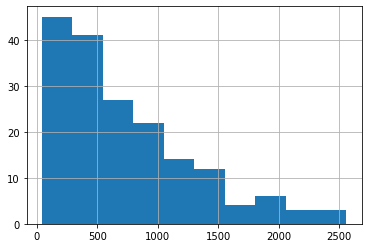

In [ ]:
probleme=data2012.loc[(data2012["key"].isin(list(pertes17)))&(data2012["Code département"]=="49")]
probleme["Inscrits2012"].hist()
probleme["Nom de la commune"][0:10]

In [ ]:
data2017.loc[data2017["Code du département"]=="75"][0:50]

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Inscrits2017,abs2017,key
29625,75,Paris,56,Paris,1301637,16.15,75.56


In [ ]:
# Missing departements
#merged_data = pd.merge(data2017,data2012_m[["key","abs2012","Inscrits2012"]],on='key',how='left')
#merged_data[merged_data["abs2012"].isna()]["Libellé du département"].unique()

In [ ]:
# Missing departements
#merged_data = pd.merge(data2017,data2012_m[["key","abs2012","Inscrits2012"]],on='key',how='left')
#merged_data[merged_data["abs2012"].isna()]["Libellé du département"].unique()

In [ ]:
#merged_data1 = pd.merge(data2017,data2012_m[["key","abs2012","Inscrits2012"]],on='key',how='inner')
#merged_data1

In [ ]:
# Missing departements
#merged_data = pd.merge(merged_data1,data2007[["key","abs2007","Inscrits2007"]],on='key',how='left')
#merged_data[merged_data["abs2007"].isna()]["Libellé du département"].unique()

In [ ]:
#merged_data = pd.merge(merged_data1,data2007[["key","abs2007","Inscrits2007"]],on='key',how='inner')
#merged_data

In [ ]:
dftotal = data2007.merge(data2012, on='key', how='inner').merge(data2017, on='key', how='inner')
dftotal.columns
var=['key', 'Code département', 'Code de la commune','Nom de la commune', 'Inscrits2007',
       'abs2007',  'Inscrits2012', 'abs2012', 'Inscrits2017','abs2017']

dftotal=dftotal[var]
dftotal   

,key,Code département,Code de la commune,Nom de la commune,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017
0,01.1,01,1,L'Abergement-Clémenciat,596,11.41,592,14.189189,598,15.38
1,01.2,01,2,L'Abergement-de-Varey,205,14.15,215,16.744186,209,11.96
2,01.4,01,4,Ambérieu-en-Bugey,8106,18.84,8205,20.694698,8586,22.85
3,01.5,01,5,Ambérieux-en-Dombes,1051,12.94,1152,14.756944,1172,18.34
4,01.6,01,6,Ambléon,112,10.71,105,16.190476,99,20.20
...,...,...,...,...,...,...,...,...,...,...
35264,2B.356,2B,356,Zalana,218,35.32,200,26.000000,198,35.35
35265,2B.361,2B,361,Zilia,194,19.59,221,20.361991,230,29.57
35266,2B.364,2B,364,Zuani,81,17.28,75,20.000000,67,26.87
35267,2B.365,2B,365,San-Gavino-di-Fiumorbo,295,26.78,296,29.054054,254,46.85


# Holidays zones

In [ ]:
#scrutin=str(input("Année:"))

lien="https://drive.google.com/uc?export=download&id=1VabPP0x49BsXjDVqQWMv0vvE0rtHI2V-"
#https://drive.google.com/file/d/1VabPP0x49BsXjDVqQWMv0vvE0rtHI2V-/view?usp=sharing


Academie=pd.read_csv(lien,sep=";",encoding="latin") #,engine="python") #,on_bad_lines="skip")
Academie["Code département"]=""


In [ ]:
Academie["Groupe"]=Academie["Zone scolaire avant 2016"].map(str)+Academie["Zone scolaire post 2016"].map(str)
Liste=[i for i in list(Academie["Groupe"].unique()) if len(i)<3]

lien_corse="Corse-du-sud (2A) Haute-corse (2B)"
Academie["Départements associés"].loc[Academie["Nom de l'académie"]=="Corse"]=lien_corse
Academie.loc[Academie["Nom de l'académie"]=="Corse"]



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Nom de l'académie,Zone scolaire avant 2016,Zone scolaire post 2016,Départements associés,Unnamed: 4,Unnamed: 5,Code département,Groupe
6,Corse,Corse,Corse,Corse-du-sud (2A) Haute-corse (2B),NaN,NaN,,CorseCorse


In [ ]:
Liste

['BB', 'BA', 'CA', 'AB', 'AA', 'CC', 'AC']

In [ ]:
bdp=Academie["Départements associés"]

dictionnaire_groupe={}
#for i in [i for i in list(Academie["Groupe"].unique())]:
#  dictionnaire_groupe[i]=[]
nb=0
for j in bdp:
  ligne=[list(i)[1:3] for i in j.split() if ((len(list(i))==4) & (list(i)[0]=='('))]
  ligne2=["".join(i) for i in ligne]

  g=Academie.loc[nb,"Groupe"]
  for k in ligne2:
    dictionnaire_groupe[k]=g
  nb+=1

In [ ]:
Récapitulatif=pd.DataFrame({"Code département":dictionnaire_groupe.keys(),"Groupes":dictionnaire_groupe.values()})
Récapitulatif=Récapitulatif.loc[Récapitulatif["Groupes"].isin(Liste)]
Récapitulatif

,Code département,Groupes
0,04,BB
1,05,BB
2,13,BB
3,84,BB
4,02,BB
...,...,...
91,82,AC
92,78,CC
93,91,CC
94,92,CC


In [ ]:
df=pd.merge(dftotal,Récapitulatif,on="Code département")
vacances=df["Groupes"].str.split("",expand=True)
vacances[0]=vacances[1]
del vacances[3]

#vacances[3]=vacances[1]+vacances[2]+vacances[0]


vacances.rename(columns={0:"vacances2007",1:"vacances2012",2:"vacances2017"},inplace=True)

data=pd.concat([df,vacances],axis=1)
data

,key,Code département,Code de la commune,Nom de la commune,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,vacances2017
0,01.1,01,1,L'Abergement-Clémenciat,596,11.41,592,14.189189,598,15.38,AA,A,A,A
1,01.2,01,2,L'Abergement-de-Varey,205,14.15,215,16.744186,209,11.96,AA,A,A,A
2,01.4,01,4,Ambérieu-en-Bugey,8106,18.84,8205,20.694698,8586,22.85,AA,A,A,A
3,01.5,01,5,Ambérieux-en-Dombes,1051,12.94,1152,14.756944,1172,18.34,AA,A,A,A
4,01.6,01,6,Ambléon,112,10.71,105,16.190476,99,20.20,AA,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34904,95.676,95,676,Villers-en-Arthies,358,9.78,382,16.753927,382,11.26,CC,C,C,C
34905,95.678,95,678,Villiers-Adam,616,9.25,595,11.932773,593,8.09,CC,C,C,C
34906,95.680,95,680,Villiers-le-Bel,12079,18.29,13269,30.770970,13213,33.24,CC,C,C,C
34907,95.682,95,682,Villiers-le-Sec,97,2.06,95,11.578947,120,8.33,CC,C,C,C


In [ ]:
data["vacances2007"]=data["vacances2007"].map({"A":"non","B":"milieu","C":"fin"})
data["vacances2012"]=data["vacances2012"].map({"A":"fin","B":"début","C":"milieu"})
data["vacances2017"]=data["vacances2017"].map({"A":"milieu","B":"fin","C":"non"})


In [ ]:
data["vacances2017"]

0        milieu
1        milieu
2        milieu
3        milieu
4        milieu
          ...  
34904       non
34905       non
34906       non
34907       non
34908       non
Name: vacances2017, Length: 34909, dtype: object

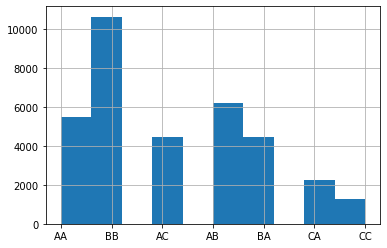

In [ ]:

data["Historique"]=data["vacances2007"]+"_"+data["vacances2012"]+"_"+data["vacances2017"]
data["Historique"].value_counts()
df["Groupes"].hist()

plt.savefig("Histogramme des zones")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.to_csv("/content/drive/MyDrive/Abstention et vacances scolaires/Base créées/abstention.csv",encoding='latin-1',index = False)
data["Code département"].unique()
data.columns

Index(['key', 'Code département', 'Code de la commune', 'Nom de la commune',
       'Inscrits2007', 'abs2007', 'Inscrits2012', 'abs2012', 'Inscrits2017',
       'abs2017', 'Groupes', 'vacances2007', 'vacances2012', 'vacances2017',
       'Historique'],
      dtype='object')

In [ ]:
data["key"].value_counts()

08.409    2
29.190    2
19.95     2
61.274    1
61.275    1
         ..
31.587    1
31.586    1
31.585    1
31.584    1
95.690    1
Name: key, Length: 34906, dtype: int64

In [ ]:
data.loc[data['Nom de la commune']=="Paris"]

,key,Code département,Code de la commune,Nom de la commune,Inscrits2007,abs2007,Inscrits2012,abs2012,Inscrits2017,abs2017,Groupes,vacances2007,vacances2012,vacances2017,Historique
29257,75.56,75,56,Paris,1221993,12.58,1253322,19.847653,1301637,16.15,CC,fin,milieu,non,fin_milieu_non


In [ ]:
"""


### On associe ici à chaque zone les numéros des codes postaux

#scrutin=str(input("Année:"))
Academie=pd.read_csv("Académie.csv",encoding="latin",sep=";")
print(Academie.columns)


def Zone_vacances(Academie,scrutin):
    if scrutin<2016:    
        var_zone="Zone scolaire avant 2016"
    else: 
        var_zone='Zone scolaire post 2016'

    dico_zone={}
    for lettre in list(Academie[var_zone].unique()):
        dico_zone[lettre]=[]



    for j in range(len(Academie)):

        dep=[]
        #print(Academie["Départements associés"][j])
        liste=list(Academie["Départements associés"][j].split(","))
        zone=str(Academie[var_zone][j])

        #print(liste)
        for k in range(len(liste)):
            dep+=[str(liste[k][-3:-1])]
        dico_zone[zone]=dico_zone[zone]+dep
    dico_zone["Corse"] =["2A","2B"]

    return dico_zone

"""    

'\n\n\n### On associe ici à chaque zone les numéros des codes postaux\n\n#scrutin=str(input("Année:"))\nAcademie=pd.read_csv("Académie.csv",encoding="latin",sep=";")\nprint(Academie.columns)\n\n\ndef Zone_vacances(Academie,scrutin):\n    if scrutin<2016:    \n        var_zone="Zone scolaire avant 2016"\n    else: \n        var_zone=\'Zone scolaire post 2016\'\n\n    dico_zone={}\n    for lettre in list(Academie[var_zone].unique()):\n        dico_zone[lettre]=[]\n\n\n\n    for j in range(len(Academie)):\n\n        dep=[]\n        #print(Academie["Départements associés"][j])\n        liste=list(Academie["Départements associés"][j].split(","))\n        zone=str(Academie[var_zone][j])\n\n        #print(liste)\n        for k in range(len(liste)):\n            dep+=[str(liste[k][-3:-1])]\n        dico_zone[zone]=dico_zone[zone]+dep\n    dico_zone["Corse"] =["2A","2B"]\n\n    return dico_zone\n\n'

In [ ]:
vac_avant_2016 = Zone_vacances(Academie,2012)
vac_apres_2016 = Zone_vacances(Academie,2017)
ABC_dep_num = vac_apres_2016["A"]+vac_apres_2016["B"]+vac_apres_2016["C"]

NameError: ignored

In [ ]:
post2016 = []
pre2016 = []
for dep in ABC_dep_num:
    for zone in ["A","B","C"]:
        if dep in vac_apres_2016[zone]:
            post2016.append(zone)
        if dep in vac_avant_2016[zone]:
            pre2016.append(zone)


In [ ]:
vacances = pd.DataFrame(list(zip([int(i) for i in ABC_dep_num], pre2016, post2016)),
               columns =['Code du département', 'Vac_pre2016', 'Vac_post2016'])
vacances["Code du département"] = vacances["Code du département"].map(str)
vacances["Code du département"].unique()

In [ ]:
# Missing departements
final_data = pd.merge(merged_data,vacances,on='Code du département',how='left')
final_data[final_data["Vac_pre2016"].isna()]["Libellé du département"].unique()

In [ ]:
final_data = pd.merge(merged_data,vacances,on='Code du département',how='inner')
final_data.DEP

## 2017:
**Vacances :** A, B

**Non vacances :** C

## 2012
**Vacances :** A, B, C

**Non vacances :** -

## 2007
**Vacances :** B, C

**Non vacances :** A

In [ ]:
final_data[(final_data["Vac_post2016"]=="C") & (final_data["Vac_pre2016"]=="A")]

In [ ]:
final_data[(final_data["Vac_post2016"]=="A") & (final_data["Vac_pre2016"]=="A")]

In [ ]:
final_data[(final_data["Vac_post2016"]=="B") & (final_data["Vac_pre2016"]=="A")]

In [ ]:
boolean = ((final_data["Vac_post2016"]=="C") & (final_data["Vac_pre2016"]=="A"))|((final_data["Vac_post2016"]=="A") & (final_data["Vac_pre2016"]=="A"))|((final_data["Vac_post2016"]=="B") & (final_data["Vac_pre2016"]=="A"))

In [ ]:
data = final_data[[not i for i in boolean]]

In [ ]:
data["Vac_post2016"].value_counts()

In [ ]:
data['Treatment'] = [1 if i == "C" else 0 for i in data["Vac_post2016"]]
data["Treatment"].value_counts()

In [ ]:
data.to_csv("final_data.csv",encoding='latin-1',index = False)